In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import os, sys

project_root = '/user_data/mmhender/featsynth/'
# sys.path.append(os.path.join(project_root, 'code'))
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils
from behav_analysis import analyze_expt2

/home/mmhender/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt2.get_categ_info()

trial_data_all, subjects, subject_cb, cue_level_names, image_type_names = analyze_expt2.load_data()
 
n_subjects = len(subjects)
n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)

acc_by_supcat, dprime_by_supcat = analyze_expt2.get_perf_by_supercateg()
acc_by_cued_supcat, dprime_by_cued_supcat = analyze_expt2.get_perf_by_cued_supercateg()

acc_by_bascat, dprime_by_bascat = analyze_expt2.get_perf_by_basiccateg()

acc_by_condition, dprime_by_condition, propyes_by_condition, rt_by_condition = analyze_expt2.get_perf_by_cond()
acc_by_nat, dprime_by_nat, propyes_by_nat = analyze_expt2.get_perf_by_nat()

acc_by_run, rt_by_run = analyze_expt2.get_perf_by_run()

/user_data/mmhender/featsynth/code/behav_analysis/analyze_expt2.py:401: RuntimeWarning: Mean of empty slice
  rt_by_run[si,ri] = np.nanmean(np.array(trial_data['rt'])[run_inds])


In [6]:
len(subjects)

34

In [4]:
# should all be above 0.50 on this since it's easy.
intact_acc = np.mean(acc_by_condition[:,:,4], axis=1)
subjects_use = intact_acc>=0.75
assert(np.all(subjects_use))
print(intact_acc)

[0.83  0.815 0.78  0.875 0.795 0.825 0.96  0.855 0.815 0.92  0.775 0.84
 0.9   0.89  0.89  0.815 0.88  0.775 0.76  0.9   0.815 0.85  0.85  0.865
 0.875 0.855 0.845 0.77  0.855 0.875 0.795 0.825 0.775 0.91 ]


In [5]:
subject_rndorder = np.array([np.array(trial_data_all['random_order_number'])[trial_data_all['subject']==si][0] \
              for si in subjects])
subject_ppd = np.array([np.array(trial_data_all['pixels_per_degree'])[trial_data_all['subject']==si][0] \
              for si in subjects])
print(subjects, subject_cb, subject_rndorder, subject_ppd)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34] [0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1] [40 11 82 46 90 94  2 17 88 38 51 93 36 94 21 68 16 13 49 93  4 48 35 75
 15 85 16 60 59 39 29 74 61 72] [36.81571976 30.         53.478825   55.44777915 30.         31.43508655
 36.08802108 30.         34.47871094 30.         38.99706762 48.55164766
 59.87244363 48.57762486 30.         31.4210548  30.         41.80883728
 30.         32.67586029 30.         35.00918172 42.76176111 38.6026013
 42.36584071 30.         32.37566011 40.48692433 34.11323728 37.90590487
 63.99970305 40.83972183 37.01459628 37.03531328]


#### Plotting params

In [6]:
cue_level_colors = np.array([[93,192,219], [44,92,168]])/255
point_types = ['o','x']
markersize = 4;
xjitters = [-0.02, 0.02]

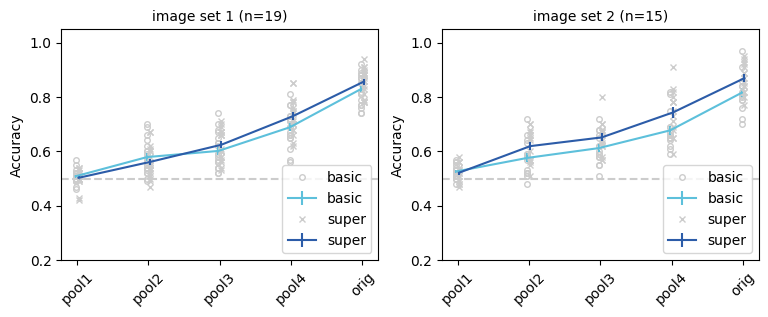

In [7]:
plot_utils.set_all_font_sizes(10)

plt.figure(figsize=(9,3))

for cbi, cb in enumerate([1,2]):

    subjects_plot = (subject_cb==cbi)
    n_subs_plot = np.sum(subjects_plot)
    
    ax = plt.subplot(1,2,cb)

    lh = []
    for cc, cue in enumerate(cue_level_names):

        vals = acc_by_condition[subjects_plot,cc,:]

        h = plt.plot(np.arange(n_image_types)+xjitters[cc], \
                     vals.T,\
                     point_types[cc],color=[0.8, 0.8, 0.8], markerfacecolor='none', 
                    markersize=markersize)
        lh.append(h[0])
        
        meanvals = np.mean(vals, axis=0)
        semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)
    
        h = plt.errorbar(np.arange(n_image_types)+xjitters[cc], \
                         meanvals, \
                         semvals, \
                        color = cue_level_colors[cc,:])
        lh.append(h)
        
        plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)
        

    plt.axhline(0.50, color=[0.8, 0.8, 0.8], linestyle='--')

    ax.legend(lh, np.repeat(cue_level_names,2), loc='lower right')

    plt.ylabel('Accuracy')

    plt.ylim([0.2, 1.05])
    
    plt.title('image set %d (n=%d)'%(cb,n_subs_plot))
    

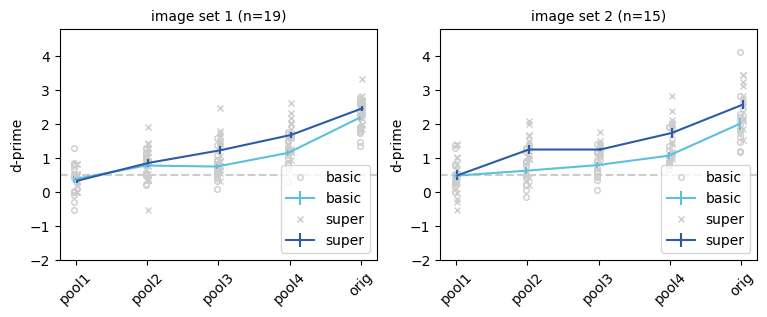

In [7]:
plot_utils.set_all_font_sizes(10)
plt.figure(figsize=(9,3))

for cbi, cb in enumerate([1,2]):

    subjects_plot = (subject_cb==cbi) 
    n_subs_plot = np.sum(subjects_plot)
    
    ax = plt.subplot(1,2,cb)

    lh = []
    for cc, cue in enumerate(cue_level_names):

        vals = dprime_by_condition[subjects_plot,cc,:]

        h = plt.plot(np.arange(n_image_types)+xjitters[cc], vals.T,\
                 point_types[cc],color=[0.8, 0.8, 0.8], markerfacecolor='none', 
                    markersize=markersize)
        lh.append(h[0])
        
        meanvals = np.mean(vals, axis=0)
        semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)
    
        h = plt.errorbar(np.arange(n_image_types)+xjitters[cc], \
                         meanvals, \
                         semvals, \
                        color = cue_level_colors[cc,:])
        
        lh.append(h)
        
        plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)
        

    plt.axhline(0.50, color=[0.8, 0.8, 0.8], linestyle='--')

    ax.legend(lh, np.repeat(cue_level_names,2), loc='lower right')

    plt.ylabel('d-prime')

    plt.ylim([-2, 4.8])
    
    plt.title('image set %d (n=%d)'%(cb,n_subs_plot))

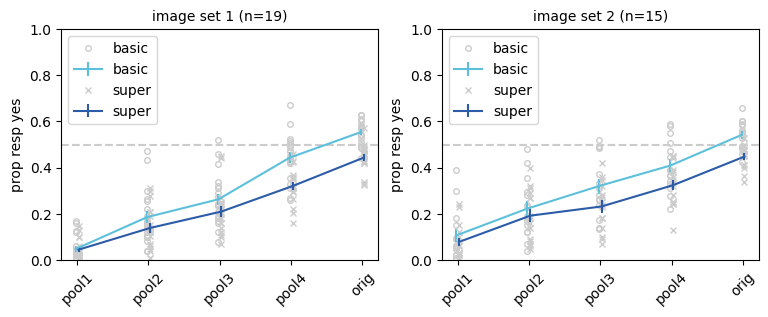

In [8]:
plot_utils.set_all_font_sizes(10)

plt.figure(figsize=(9,3))

for cbi, cb in enumerate([1,2]):

    subjects_plot = (subject_cb==cbi)
    n_subs_plot = np.sum(subjects_plot)
    
    ax = plt.subplot(1,2,cb)


    lh = []
    for cc, cue in enumerate(cue_level_names):

        vals = propyes_by_condition[subjects_plot,cc,:]

        h = plt.plot(np.arange(n_image_types)+xjitters[cc], vals.T,\
                 point_types[cc],color=[0.8, 0.8, 0.8], markerfacecolor='none', 
                    markersize=markersize)
        lh.append(h[0])
        
        meanvals = np.mean(vals, axis=0)
        semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)
    
        h = plt.errorbar(np.arange(n_image_types)+xjitters[cc], \
                         meanvals, \
                         semvals, \
                        color = cue_level_colors[cc,:])
        
        lh.append(h)
        
        plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)
        

    plt.axhline(0.50, color=[0.8, 0.8, 0.8], linestyle='--')

    ax.legend(lh, np.repeat(cue_level_names,2), loc='upper left')

    plt.ylabel('prop resp yes')

    plt.ylim([0, 1])
    
    plt.title('image set %d (n=%d)'%(cb,n_subs_plot))

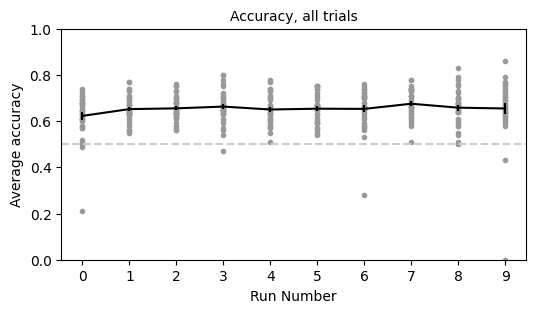

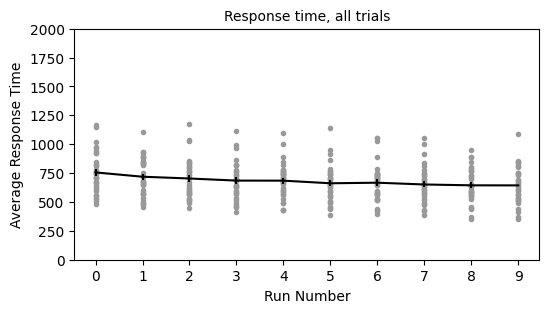

In [8]:
plot_vals = acc_by_run
n_runs = plot_vals.shape[1]
meanvals = np.mean(plot_vals, axis=0)
semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])
plt.figure(figsize=(6,3))

for si in range(n_subjects):
    plt.plot(np.arange(n_runs), plot_vals[si,:],'.',color=[0.6, 0.6, 0.6])
plt.errorbar(np.arange(len(meanvals)), meanvals, semvals, color='k')
plt.xticks(np.arange(n_runs))
plt.xlabel('Run Number')
plt.ylabel('Average accuracy')
plt.axhline(0.50, color=[0.8, 0.8, 0.8], linestyle='--')
plt.ylim([0.0, 1.0])
plt.title('Accuracy, all trials')

plot_vals = rt_by_run
meanvals = np.nanmean(plot_vals, axis=0)
semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])
plt.figure(figsize=(6,3))
for si in range(n_subjects):
    plt.plot(np.arange(n_runs), plot_vals[si,:],'.',color=[0.6, 0.6, 0.6])
plt.errorbar(np.arange(len(meanvals)), meanvals, semvals, color='k')
plt.xticks(np.arange(n_runs))
plt.xlabel('Run Number')
plt.ylabel('Average Response Time')
ylims = [0, 2000]
plt.ylim(ylims)
plt.title('Response time, all trials');

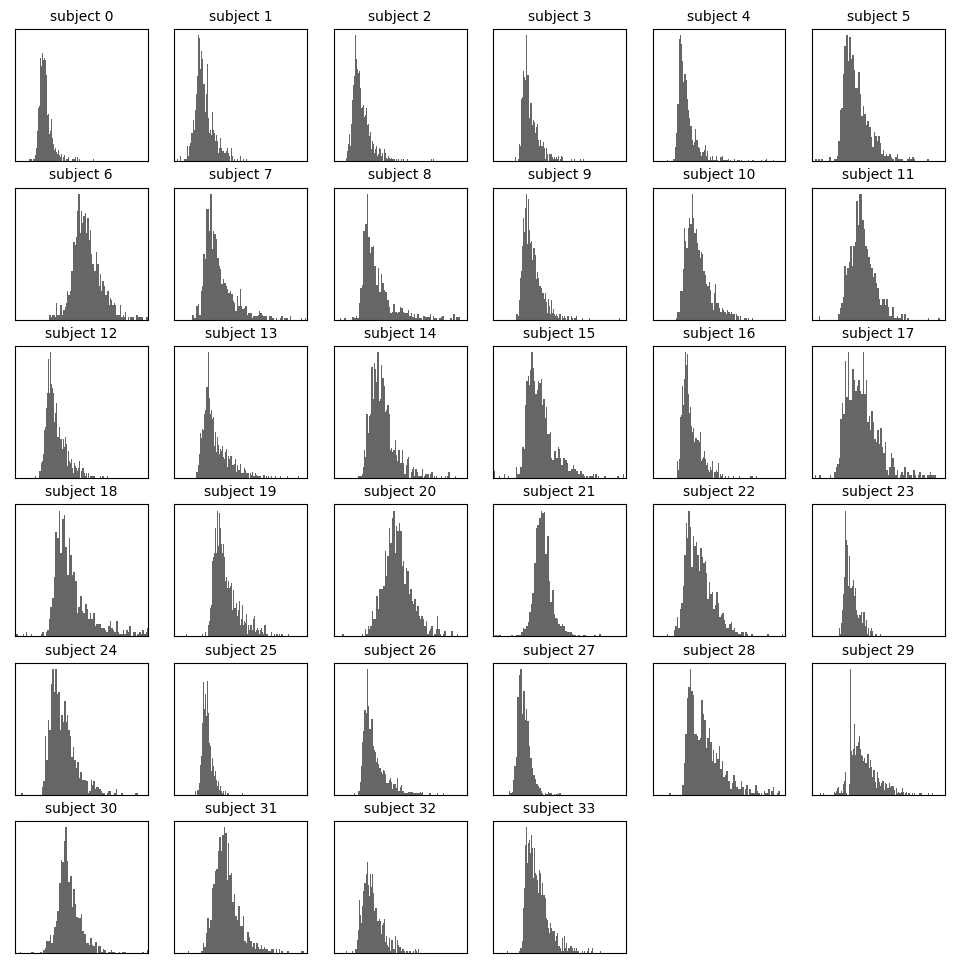

In [9]:
plt.figure(figsize=(12,12))
npy = int(np.ceil(np.sqrt(n_subjects)))
npx = int(np.ceil(n_subjects/npy))
xlims = [0, 2000]

for si,ss in enumerate(subjects):

    plt.subplot(npx, npy, si+1)
    
    rts = np.array(trial_data_all['rt'])[trial_data_all['subject']==ss]
    
    plt.hist(rts,100, color=[0.4, 0.4, 0.4]);
    
    plt.title('subject %d'%si)
    
    plt.xlim(xlims)
    plt.xticks([])
    plt.yticks([])

#### Analyze natural vs artificial

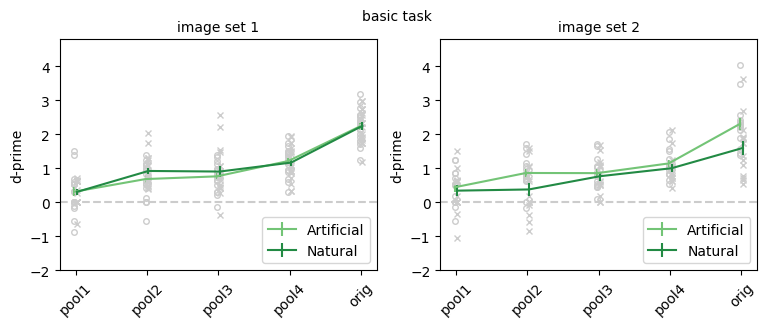

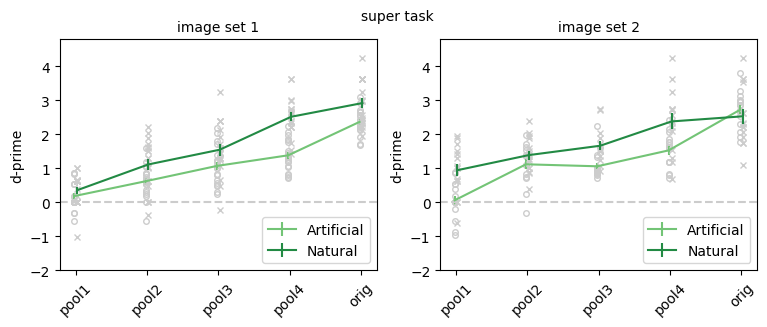

In [11]:
plot_utils.set_all_font_sizes(10)


nat_colors = cm.Greens(np.linspace(0,1,5))[[2,3],:]
n_kinds = 2
kind_names = ['Artificial','Natural']

for cc in [0,1]:
    
    plt.figure(figsize=(9,3))

    for cbi, cb in enumerate([1,2]):
    
        ax = plt.subplot(1,2,cb)
        
        subjects_plot = (subject_cb==cbi) 
        n_subs_plot = np.sum(subjects_plot)
        vals = dprime_by_nat[subjects_plot,cc,:,:]
        
        plot_vals = vals;
        meanvals = np.mean(plot_vals, axis=0)
        semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])

        lh = []
        
        for kk in range(n_kinds):

            for si in range(n_subs_plot):
                
                h = plt.plot(np.arange(n_image_types)+xjitters[kk], \
                             plot_vals[si,:,kk],\
                             point_types[kk],color=[0.8, 0.8, 0.8], markerfacecolor='none', 
                            markersize=markersize)
                # lh.append(h[0])

            h = plt.errorbar(np.arange(n_image_types)+xjitters[kk], \
                             meanvals[:,kk], \
                             semvals[:,kk], \
                            color = nat_colors[kk,:])
            lh.append(h)
            
        plt.title('image set %d'%(cb))
        
        plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)


        plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

        ax.legend(lh, kind_names, loc='lower right')

        plt.ylabel('d-prime')

        plt.ylim([-2, 4.8])
        
    plt.suptitle('%s task'%(cue_level_names[cc]))

#### Plotting accuracy for some individual categories
all conditions

Text(0.5, 0.98, 'Performance across all conds')

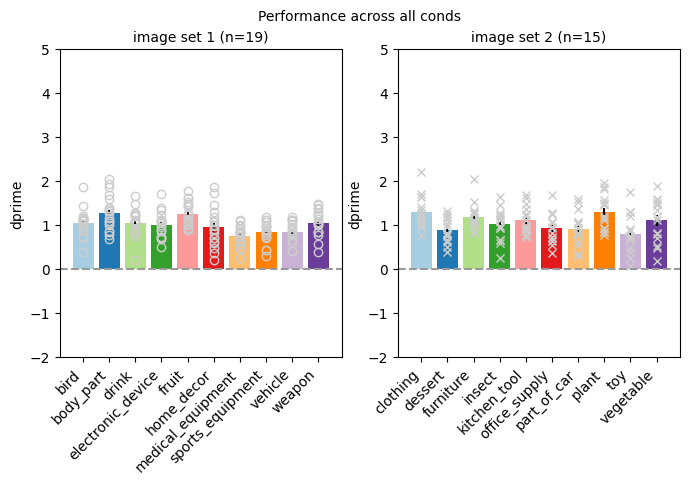

In [20]:

plt.figure(figsize=(8,4))

for cbi, cb in enumerate([1,2]):

    subjects_plot = (subject_cb==cbi) 
    n_subs_plot = np.sum(subjects_plot)
    
    plt.subplot(1,2,cb)

    vals = dprime_by_supcat[cbi]

    supnames = super_names[super_cbinds==cbi]

    plot_vals = np.mean(np.mean(vals, axis=1), axis=1)
    meanvals = np.mean(plot_vals, axis=0)
    semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])
    
    # plt.bar(np.arange(len(meanvals)), meanvals, color=cue_level_colors[cc,:])
    plt.bar(np.arange(len(meanvals)), meanvals, color=cm.Paired(np.linspace(0, 1, 12))[0:10,:])
    
    plt.errorbar(np.arange(len(meanvals)), meanvals, semvals, linestyle='none', color='k')
    for si in range(n_subs_plot):
        plt.plot(np.arange(len(meanvals)), plot_vals[si,:], \
                 point_types[cbi], color=[0.8,0.8,0.8], markerfacecolor='none')
    plt.axhline(0.0, color=[0.6, 0.6, 0.6], linestyle='--')
    plt.xticks(np.arange(len(meanvals)), supnames, rotation=45, ha='right')
    plt.ylim([-2,5])
    plt.ylabel('dprime')
    
    plt.title('image set %d (n=%d)'%(cb,n_subs_plot))
    
plt.suptitle('Performance across all conds')

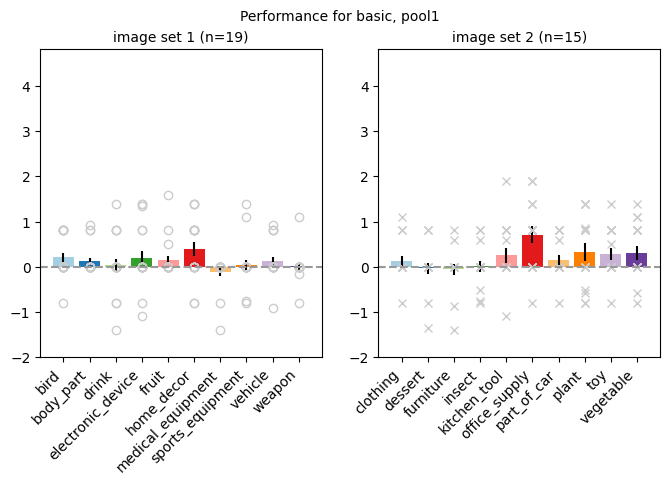

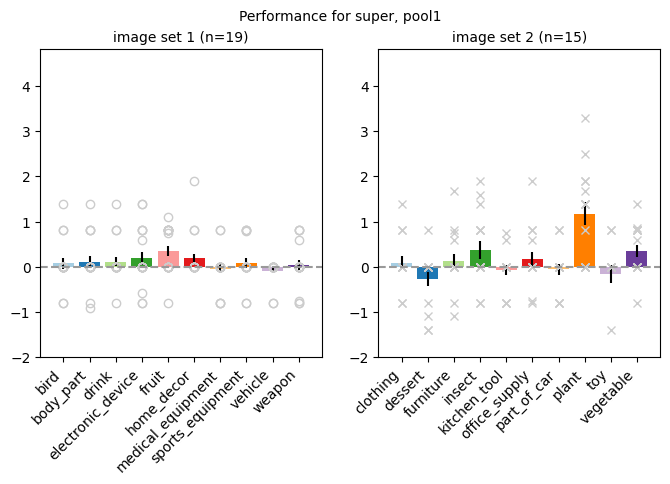

In [21]:
for cc in [0,1]:

    ii = 0;

    plt.figure(figsize=(8,4))

    for cbi, cb in enumerate([1,2]):

        subjects_plot = (subject_cb==cbi) 
        n_subs_plot = np.sum(subjects_plot)

        plt.subplot(1,2,cb)

        vals = dprime_by_supcat[cbi]

        supnames = super_names[super_cbinds==cbi]

        plot_vals = vals[:,cc,ii,:]
        meanvals = np.mean(plot_vals, axis=0)
        semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])

        # plt.bar(np.arange(len(meanvals)), meanvals, color=cue_level_colors[cc,:])
        plt.bar(np.arange(len(meanvals)), meanvals, color=cm.Paired(np.linspace(0, 1, 12))[0:10,:])

        plt.errorbar(np.arange(len(meanvals)), meanvals, semvals, linestyle='none', color='k')
        for si in range(n_subs_plot):
            plt.plot(np.arange(len(meanvals)), plot_vals[si,:], \
                     point_types[cbi], color=[0.8,0.8,0.8], markerfacecolor='none')
        plt.axhline(0, color=[0.6, 0.6, 0.6], linestyle='--')
        plt.xticks(np.arange(len(meanvals)), supnames, rotation=45, ha='right')
        plt.ylim([-2, 4.8])

        plt.title('image set %d (n=%d)'%(cb,n_subs_plot))

    plt.suptitle('Performance for %s, %s'%(cue_level_names[cc], image_type_names[ii]))

Text(0.5, 0.98, 'Performance across all conds')

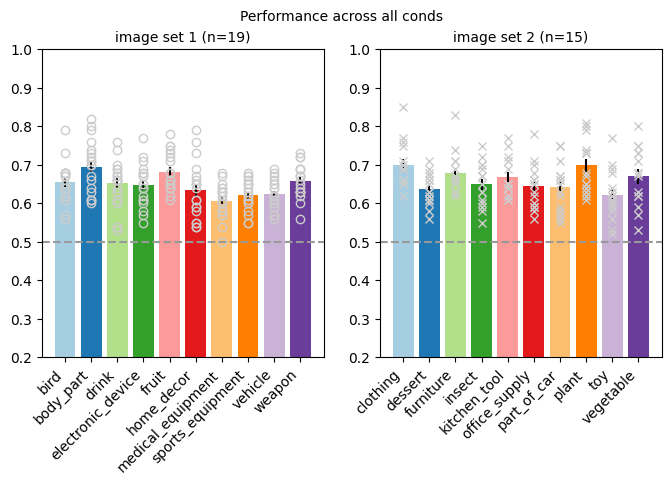

In [12]:

plt.figure(figsize=(8,4))

for cbi, cb in enumerate([1,2]):

    subjects_plot = (subject_cb==cbi) 
    n_subs_plot = np.sum(subjects_plot)
    
    plt.subplot(1,2,cb)

    vals = acc_by_supcat[cbi]

    supnames = super_names[super_cbinds==cbi]

    plot_vals = np.mean(np.mean(vals, axis=1), axis=1)
    meanvals = np.mean(plot_vals, axis=0)
    semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])
    
    # plt.bar(np.arange(len(meanvals)), meanvals, color=cue_level_colors[cc,:])
    plt.bar(np.arange(len(meanvals)), meanvals, color=cm.Paired(np.linspace(0, 1, 12))[0:10,:])
    
    plt.errorbar(np.arange(len(meanvals)), meanvals, semvals, linestyle='none', color='k')
    for si in range(n_subs_plot):
        plt.plot(np.arange(len(meanvals)), plot_vals[si,:], \
                 point_types[cbi], color=[0.8,0.8,0.8], markerfacecolor='none')
    plt.axhline(0.50, color=[0.6, 0.6, 0.6], linestyle='--')
    plt.xticks(np.arange(len(meanvals)), supnames, rotation=45, ha='right')
    plt.ylim([0.2, 1.0])

    plt.title('image set %d (n=%d)'%(cb,n_subs_plot))
    
plt.suptitle('Performance across all conds')

Text(0.5, 0.98, 'Performance across basic-level conds')

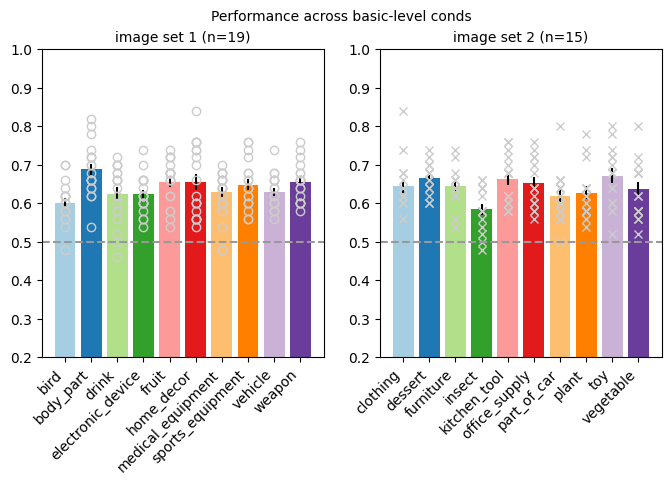

In [13]:

ci = 0;

plt.figure(figsize=(8,4))

for cbi, cb in enumerate([1,2]):

    subjects_plot = (subject_cb==cbi) 
    n_subs_plot = np.sum(subjects_plot)
    
    plt.subplot(1,2,cb)

    vals = acc_by_supcat[cbi][:,ci:ci+1,:,:]

    supnames = super_names[super_cbinds==cbi]

    plot_vals = np.mean(np.mean(vals, axis=1), axis=1)
    meanvals = np.mean(plot_vals, axis=0)
    semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])
    
    # plt.bar(np.arange(len(meanvals)), meanvals, color=cue_level_colors[cc,:])
    plt.bar(np.arange(len(meanvals)), meanvals, color=cm.Paired(np.linspace(0, 1, 12))[0:10,:])
    
    plt.errorbar(np.arange(len(meanvals)), meanvals, semvals, linestyle='none', color='k')
    for si in range(n_subs_plot):
        plt.plot(np.arange(len(meanvals)), plot_vals[si,:], \
                 point_types[cbi], color=[0.8,0.8,0.8], markerfacecolor='none')
    plt.axhline(0.50, color=[0.6, 0.6, 0.6], linestyle='--')
    plt.xticks(np.arange(len(meanvals)), supnames, rotation=45, ha='right')
    plt.ylim([0.2, 1.0])

    plt.title('image set %d (n=%d)'%(cb,n_subs_plot))
    
plt.suptitle('Performance across basic-level conds')

In [10]:
cue_level_names

array(['basic', 'super'], dtype=object)

In [14]:
ci = 0

for cbi, cb in enumerate([1,2]):

    vals = acc_by_supcat[cbi][:,ci:ci+1,:,:]

    supnames = super_names[super_cbinds==cbi]

    plot_vals = np.mean(np.mean(vals, axis=1), axis=1)
    meanvals = np.mean(plot_vals, axis=0)
    
    order = np.flip(np.argsort(meanvals))
    
    group1 = order[np.arange(0,10,2)]
    group2 = order[np.arange(1,10,2)]
    
    print(supnames[group1])
    print(supnames[group2])
    # print(len(np.unique(meanvals)))
    # print(supnames[])

['body_part' 'home_decor' 'sports_equipment' 'medical_equipment'
 'electronic_device']
['fruit' 'weapon' 'vehicle' 'drink' 'bird']
['toy' 'kitchen_tool' 'clothing' 'vegetable' 'part_of_car']
['dessert' 'office_supply' 'furniture' 'plant' 'insect']


In [23]:
vals.shape

(3, 1, 5, 10)

In [24]:
len(np.unique(meanvals))

9

In [25]:
analyze_expt2.save_categ_info()

In [26]:
fn2load = os.path.join(project_root, 'code', 'make_expt_designs', 'expt2_categ_info.npy')
categ_info = np.load(fn2load, allow_pickle=True).item()
categ_info

{'super_names': array(['bird', 'body_part', 'drink', 'electronic_device', 'fruit',
        'home_decor', 'medical_equipment', 'sports_equipment', 'vehicle',
        'weapon', 'clothing', 'dessert', 'furniture', 'insect',
        'kitchen_tool', 'office_supply', 'part_of_car', 'plant', 'toy',
        'vegetable'], dtype=object),
 'super_cbinds': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'basic_names': array(['chick', 'duck', 'eagle', 'ostrich', 'parrot', 'peacock',
        'pelican', 'pigeon', 'toucan', 'vulture', 'arm', 'ear', 'elbow',
        'eye', 'hair', 'leg', 'mouth', 'skin', 'tongue', 'wrist',
        'champagne', 'espresso', 'hot_chocolate', 'juice', 'latte', 'milk',
        'smoothie', 'soda', 'tea', 'wine', 'cd_player', 'cellphone',
        'computer_screen', 'modem', 'projector', 'remote_control',
        'stereo', 'tablet', 'tape_recorder', 'television', 'apple',
        'coconut', 'cranberry', 'kiwi', 'peach', 'pineapple', 'plum',
        'prune

#### Accuracy as a function of which category was "cued" verbally

regardless of what image was shown

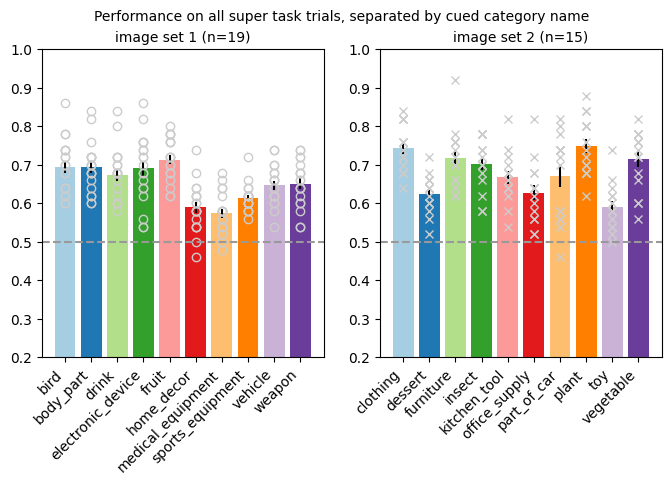

In [15]:

plt.figure(figsize=(8,4))

for cbi, cb in enumerate([1,2]):

    subjects_plot = (subject_cb==cbi) 
    n_subs_plot = np.sum(subjects_plot)
    
    plt.subplot(1,2,cb)

    vals = acc_by_cued_supcat[cbi]

    supnames = super_names[super_cbinds==cbi]

    plot_vals = np.mean(np.mean(vals, axis=1), axis=1)
    meanvals = np.mean(plot_vals, axis=0)
    semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])
    
    # plt.bar(np.arange(len(meanvals)), meanvals, color=cue_level_colors[cc,:])
    plt.bar(np.arange(len(meanvals)), meanvals, color=cm.Paired(np.linspace(0, 1, 12))[0:10,:])
    
    plt.errorbar(np.arange(len(meanvals)), meanvals, semvals, linestyle='none', color='k')
    for si in range(n_subs_plot):
        plt.plot(np.arange(len(meanvals)), plot_vals[si,:], \
                 point_types[cbi], color=[0.8,0.8,0.8], markerfacecolor='none')
    plt.axhline(0.50, color=[0.6, 0.6, 0.6], linestyle='--')
    plt.xticks(np.arange(len(meanvals)), supnames, rotation=45, ha='right')
    plt.ylim([0.2, 1.0])

    plt.title('image set %d (n=%d)'%(cb,n_subs_plot))
    
plt.suptitle('Performance on all super task trials, separated by cued category name');

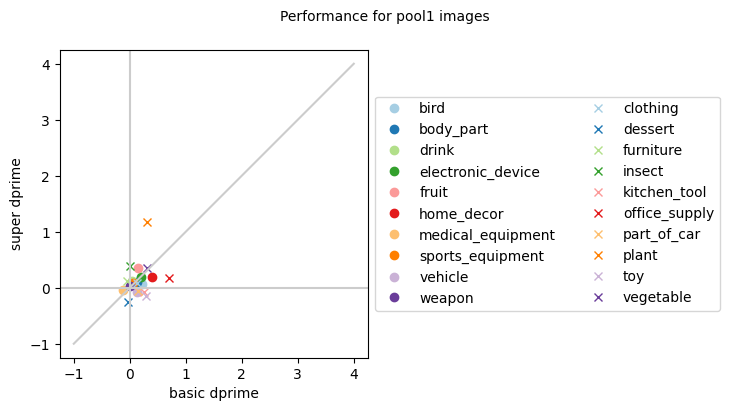

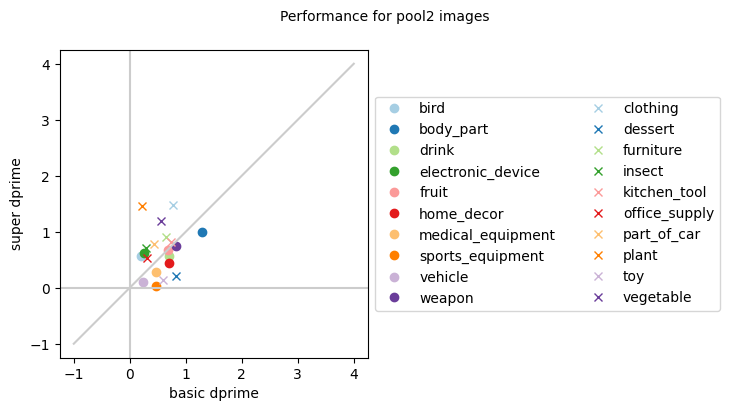

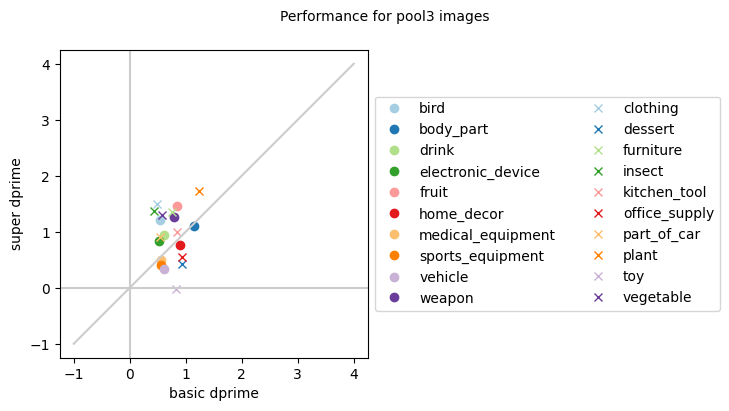

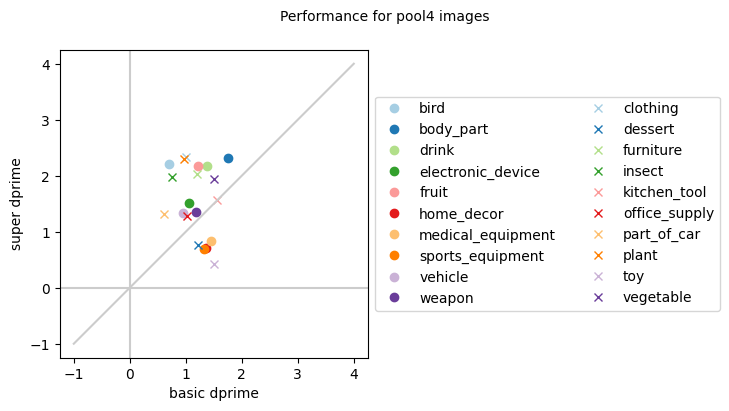

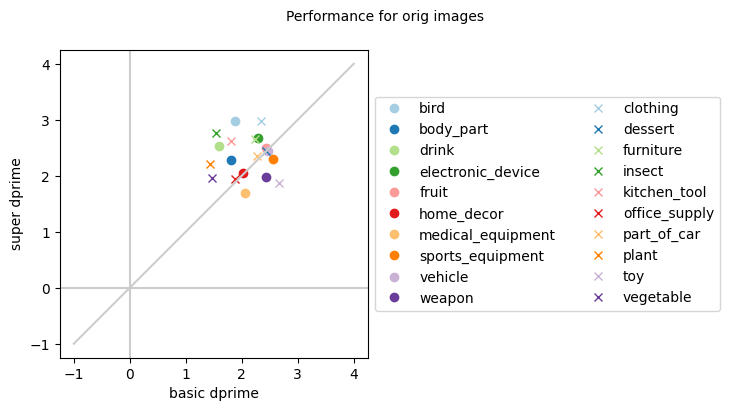

In [22]:
lims = [-1,4]

for ii, imtype in enumerate(image_type_names):

    plt.figure(figsize=(12,4))

    ax = plt.subplot(1,1,1)

    allh = []
    for cbi, cb in enumerate([1,2]):

        subjects_plot = (subject_cb==cbi) 
        n_subs_plot = np.sum(subjects_plot)

        # ax = plt.subplot(1,2,cb)

        vals = dprime_by_supcat[cbi]

        supnames = super_names[super_cbinds==cbi]

        plot_vals1 = vals[:,0,ii,:]
        plot_vals2 = vals[:,1,ii,:]
        meanvals1 = np.mean(plot_vals1, axis=0)
        meanvals2 = np.mean(plot_vals2, axis=0)
        
        assert(np.all(meanvals1<lims[1]) & np.all(meanvals1>lims[0]))
        assert(np.all(meanvals2<lims[1]) & np.all(meanvals2>lims[0]))

        
        cmap = cm.Paired(np.linspace(0, 1, 12))[0:10,:]
        
        for xx in range(len(meanvals1)):
            h = plt.plot(meanvals1[xx], meanvals2[xx], point_types[cbi], color=cmap[xx,:])
            allh+=[h[0]]

    plt.ylim(lims)
    plt.xlim(lims)
    plt.plot(lims, lims, color=[0.8, 0.8, 0.8])
    plt.axvline(0, color=[0.8, 0.8, 0.8])
    plt.axhline(0, color=[0.8, 0.8, 0.8])

    plt.xlabel('basic dprime')
    plt.ylabel('super dprime')

    # plt.title('image set %d (n=%d)'%(cb,n_subs_plot))

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])

    plt.axis('square')
    # Put a legend to the right of the current axis
    ax.legend(allh, list(super_names), loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)


    plt.suptitle('Performance for %s images'%(imtype))

#### Plot accuracy for the hardest condition
For some individual categories

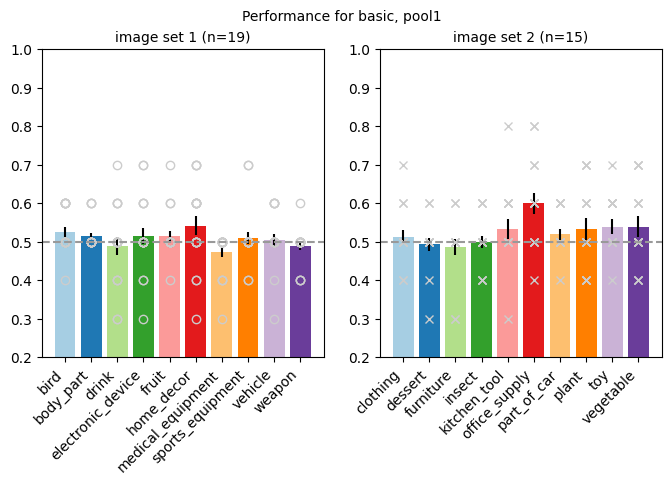

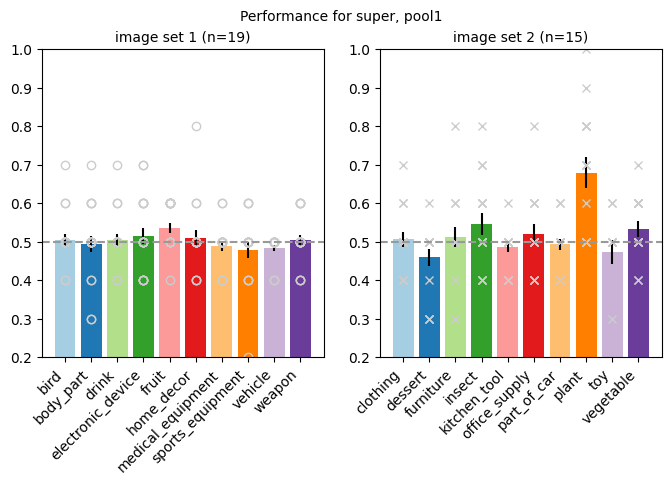

In [18]:
for cc in [0,1]:

    ii = 0;

    plt.figure(figsize=(8,4))

    for cbi, cb in enumerate([1,2]):

        subjects_plot = (subject_cb==cbi) 
        n_subs_plot = np.sum(subjects_plot)

        plt.subplot(1,2,cb)

        vals = acc_by_supcat[cbi]

        supnames = super_names[super_cbinds==cbi]

        plot_vals = vals[:,cc,ii,:]
        meanvals = np.mean(plot_vals, axis=0)
        semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])

        # plt.bar(np.arange(len(meanvals)), meanvals, color=cue_level_colors[cc,:])
        plt.bar(np.arange(len(meanvals)), meanvals, color=cm.Paired(np.linspace(0, 1, 12))[0:10,:])

        plt.errorbar(np.arange(len(meanvals)), meanvals, semvals, linestyle='none', color='k')
        for si in range(n_subs_plot):
            plt.plot(np.arange(len(meanvals)), plot_vals[si,:], \
                     point_types[cbi], color=[0.8,0.8,0.8], markerfacecolor='none')
        plt.axhline(0.50, color=[0.6, 0.6, 0.6], linestyle='--')
        plt.xticks(np.arange(len(meanvals)), supnames, rotation=45, ha='right')
        plt.ylim([0.2, 1.0])

        plt.title('image set %d (n=%d)'%(cb,n_subs_plot))

    plt.suptitle('Performance for %s, %s'%(cue_level_names[cc], image_type_names[ii]))